In [22]:
X = [[60], [140], [210], [380], [860]]
y = [[42], [91], [96], [240], [420]]

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
#font = FontProperties(fname=r"c:\windows\fonts\msyh.ttc", size=10)

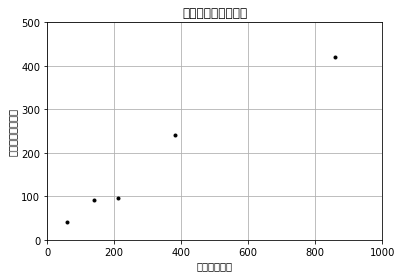

In [24]:
def generateplt():
    plt.figure()
    plt.title('高铁价格与里程数据')#,fontproperties=font)
    plt.xlabel('里程（公里）')#,fontproperties=font)
    plt.ylabel('价格（人民币元）')#,fontproperties=font)
    plt.axis([0, 1000, 0, 500])
    plt.grid(True)
    return plt

plt = generateplt()
plt.plot(X, y, 'k.')
plt.show()

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
# 创建并拟合模型
model = LinearRegression()
model.fit(X, y)
print('预测一张600公里里程的高铁票的价格：￥%.0f' % model.predict([600])[0])
print('预测一张600公里里程的高铁票的价格：￥%.0f' % model.predict([720])[0])

预测一张600公里里程的高铁票的价格：￥307
预测一张600公里里程的高铁票的价格：￥364


/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


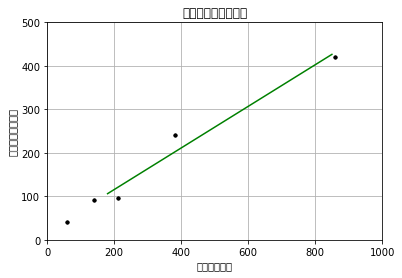

In [27]:
plt = generateplt()
plt.plot(X, y, 'k.')
X2 = [[180], [360], [600], [720], [850]]

y2 = model.predict(X2)
plt.plot(X, y, 'k.')
plt.plot(X2, y2, 'g-')
plt.show()

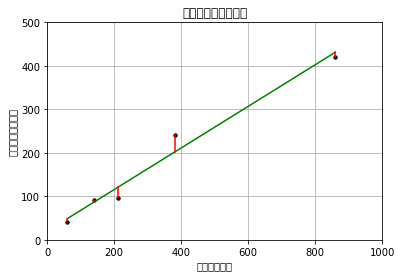

In [28]:

plt = generateplt()
plt.plot(X, y, 'k.')
X2 = [[60], [140], [210], [380], [860]]
model = LinearRegression()
model.fit(X, y)
y2 = model.predict(X2)
plt.plot(X, y, 'k.')
plt.plot(X2, y2, 'g-')
# 残差预测值
yr = model.predict(X)
for idx, x in enumerate(X):
    plt.plot([x, x], [y[idx], yr[idx]], 'r-')
    
plt.show()

In [29]:
# 如果是Python2，加from __future__ import division
xbar = (60 + 140 + 210 + 380 + 860) / 5
variance = ((60 - xbar)**2 + (140 - xbar)**2 + (210 - xbar)**2 + (380 - xbar)**2 + (860 - xbar)**2) / 4
print(variance)

101700.0


In [30]:
import numpy as np

In [31]:
print(np.var([60, 140, 210, 380, 860], ddof=1))

101700.0


In [32]:
ybar = (42 + 72 + 96 + 186 + 360) / 5
cov = ((60 - xbar) * (42 - ybar) + (140 - xbar) * (72 - ybar) + (210 - xbar) *(96 - ybar) + (380 - xbar)* (186 - ybar) + (860 - xbar) * (360 - ybar)) / 4
print(cov)

40890.0


In [33]:
print(np.cov([60, 140, 210, 380, 860], [42, 72, 96, 186, 360])[0][1])

40890.0


In [34]:
b = cov / variance
print(b)

0.4020648967551622


a = ybar - b*xbar

In [35]:
a = ybar - b * xbar
print(a)

18.518584070796464


y = 18.5 + 0.4*x

In [36]:
price1 = a + b * 180
price2 = a + b * 320
print('一张180公里里程的高铁票的价格：￥%.0f' % price1)
print('一张320公里里程的高铁票的价格：￥%.0f' % price2)

一张180公里里程的高铁票的价格：￥91
一张320公里里程的高铁票的价格：￥147


In [38]:
mean = (40 + 116 + 175 + 306 + 428) / 5
SStot = (40 - mean)*(40 - mean) + (116 - mean)*(116 - mean) + (175 - mean)*(175 - mean) + (306 - mean)*(306 - mean) + (428 - mean)*(428 - mean)
print(SStot)

95656.0


In [39]:
SSres = (40-54)*(40-54) + (116-121)*(116-121) + (175-173)*(175-173) + (360-291)*(360-291) + (428-400)*(428-400)
print(SSres)

5770


In [40]:
R2 = 1- SSres / SStot
print(R2)

0.9396796855398512


In [42]:
# 测试集
#X_test = [[88], [256], [384], [678], [950]]
#y_test = [[40], [116], [175], [306], [428]]
#model = LinearRegression()
#model.fit(X, y)
#thisY = model.predict(X_test)
#print(thisY)
model.score(X, y)

0.97636589465605261